In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [20, 10]
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("../data/processed/plato_targets_LOPS2_processed.csv")

# filter for FGK stars and remove 0 mass or radius
data = data[data["Stellar Type"] == "FGK"]
data = data[(data["Radius"] > 0) & (data["Mass"] > 0)]

<Axes: xlabel='Mass', ylabel='Density'>

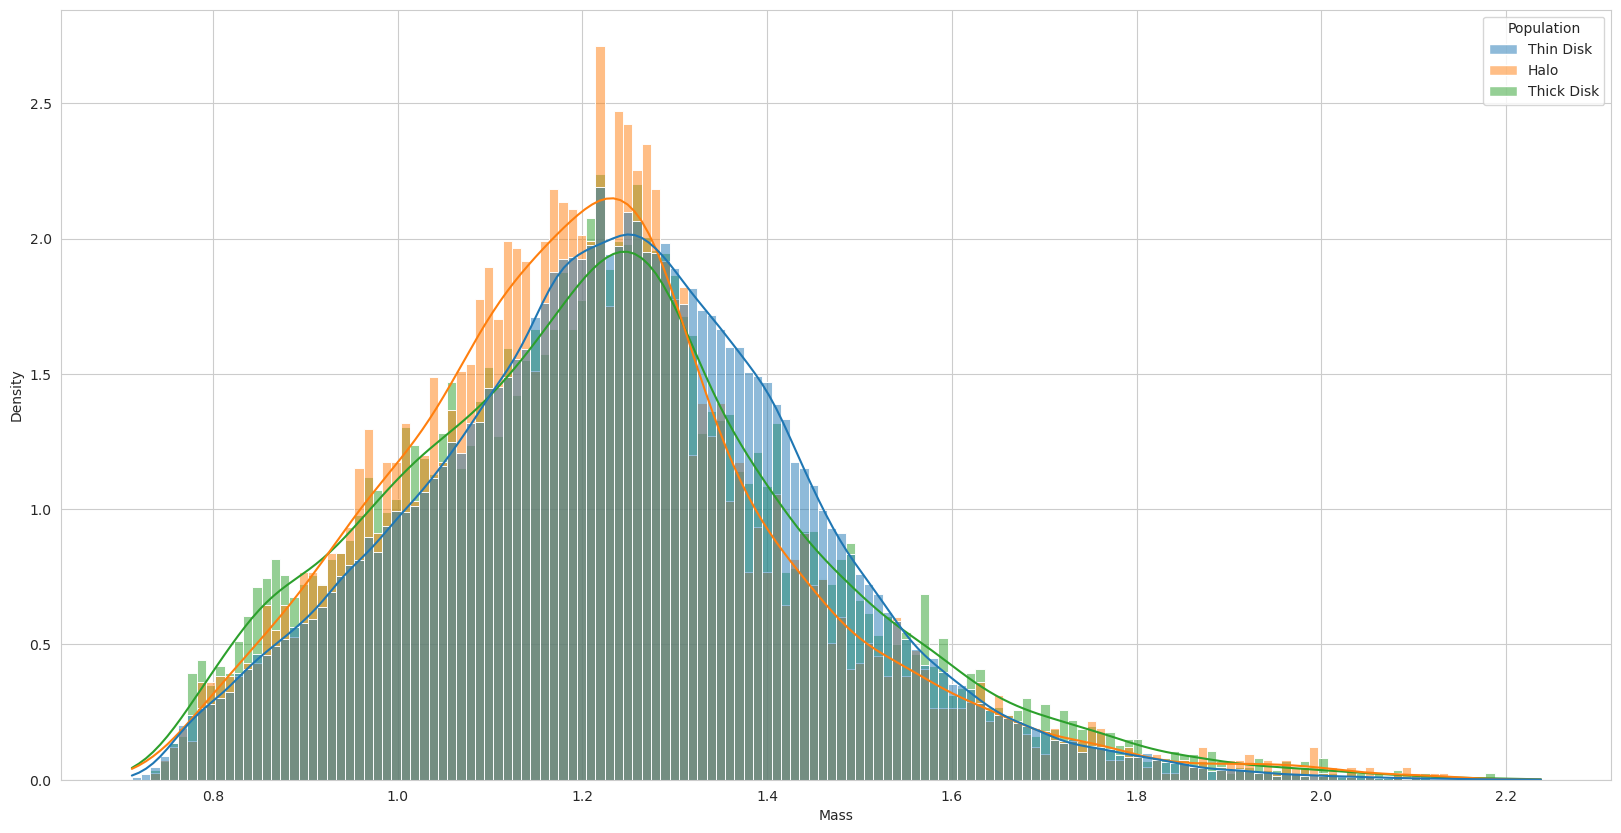

In [3]:
sns.histplot(
    data=data,
    x="Mass",
    hue="Population",
    stat="density",
    common_norm=False,
    kde=True,
)

<Axes: xlabel='Radius', ylabel='Density'>

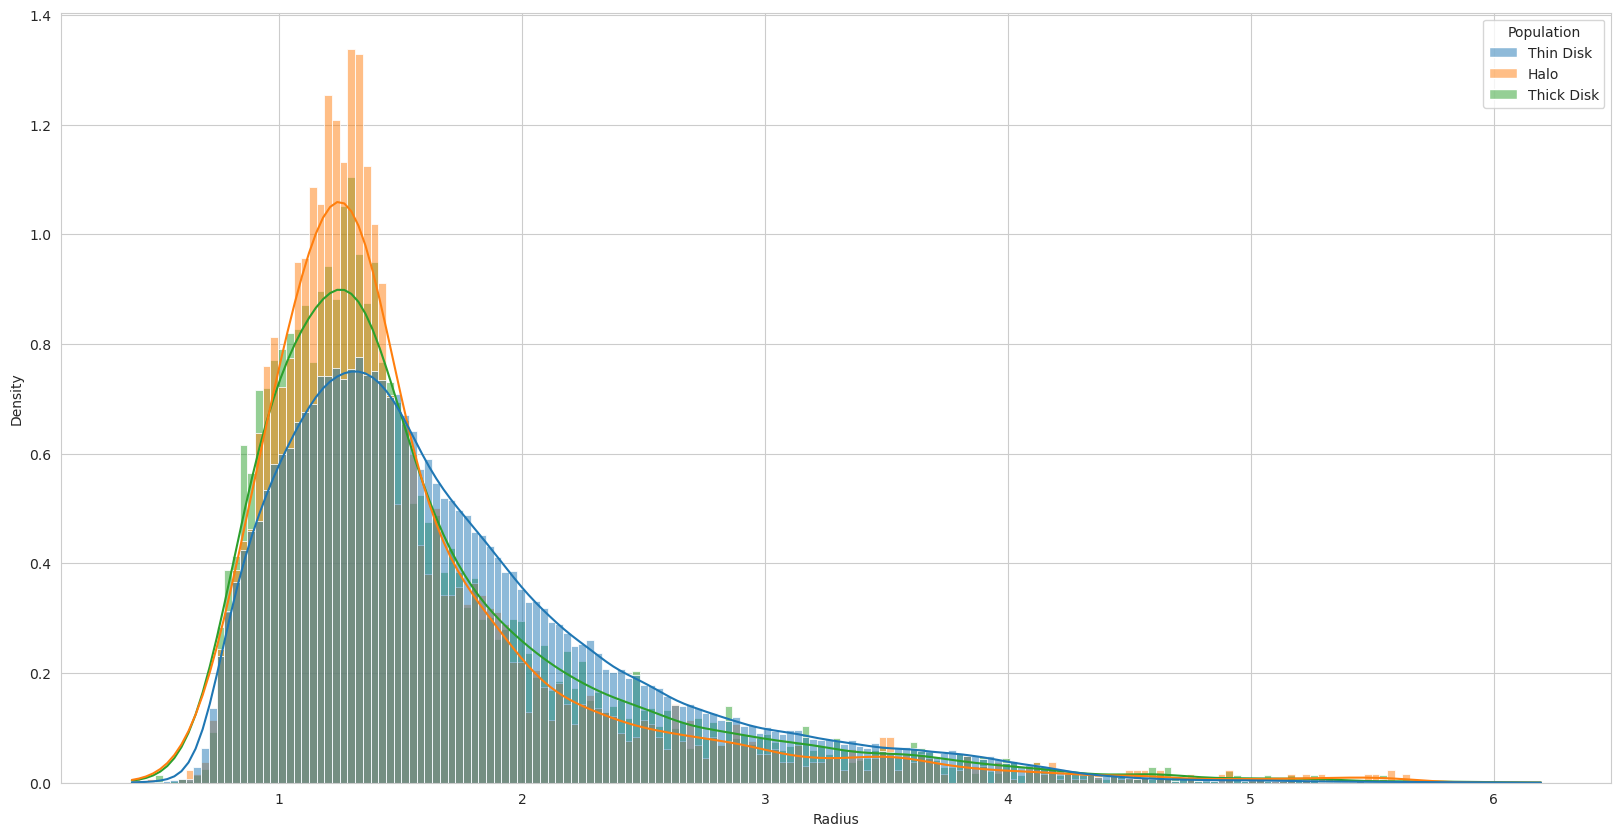

In [4]:
sns.histplot(
    data=data,
    x="Radius",
    hue="Population",
    stat="density",
    common_norm=False,
    kde=True,
)

<Axes: xlabel='gaiaV', ylabel='Density'>

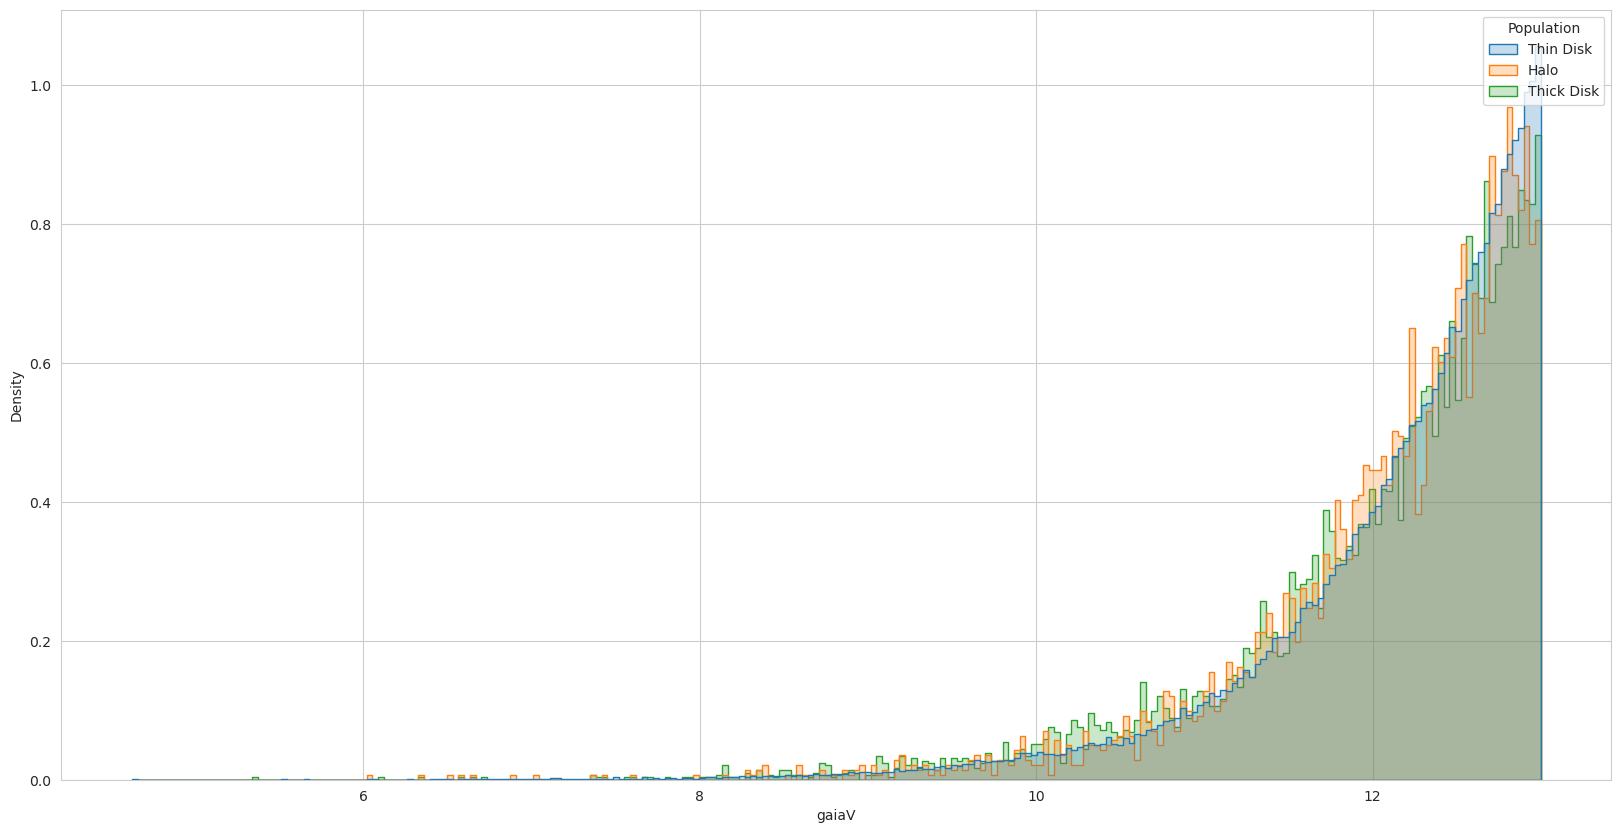

In [5]:
sns.histplot(
    data=data,
    x="gaiaV",
    hue="Population",
    stat="density",
    common_norm=False,
    element="step",
)

<Axes: xlabel='[Fe/H]', ylabel='Density'>

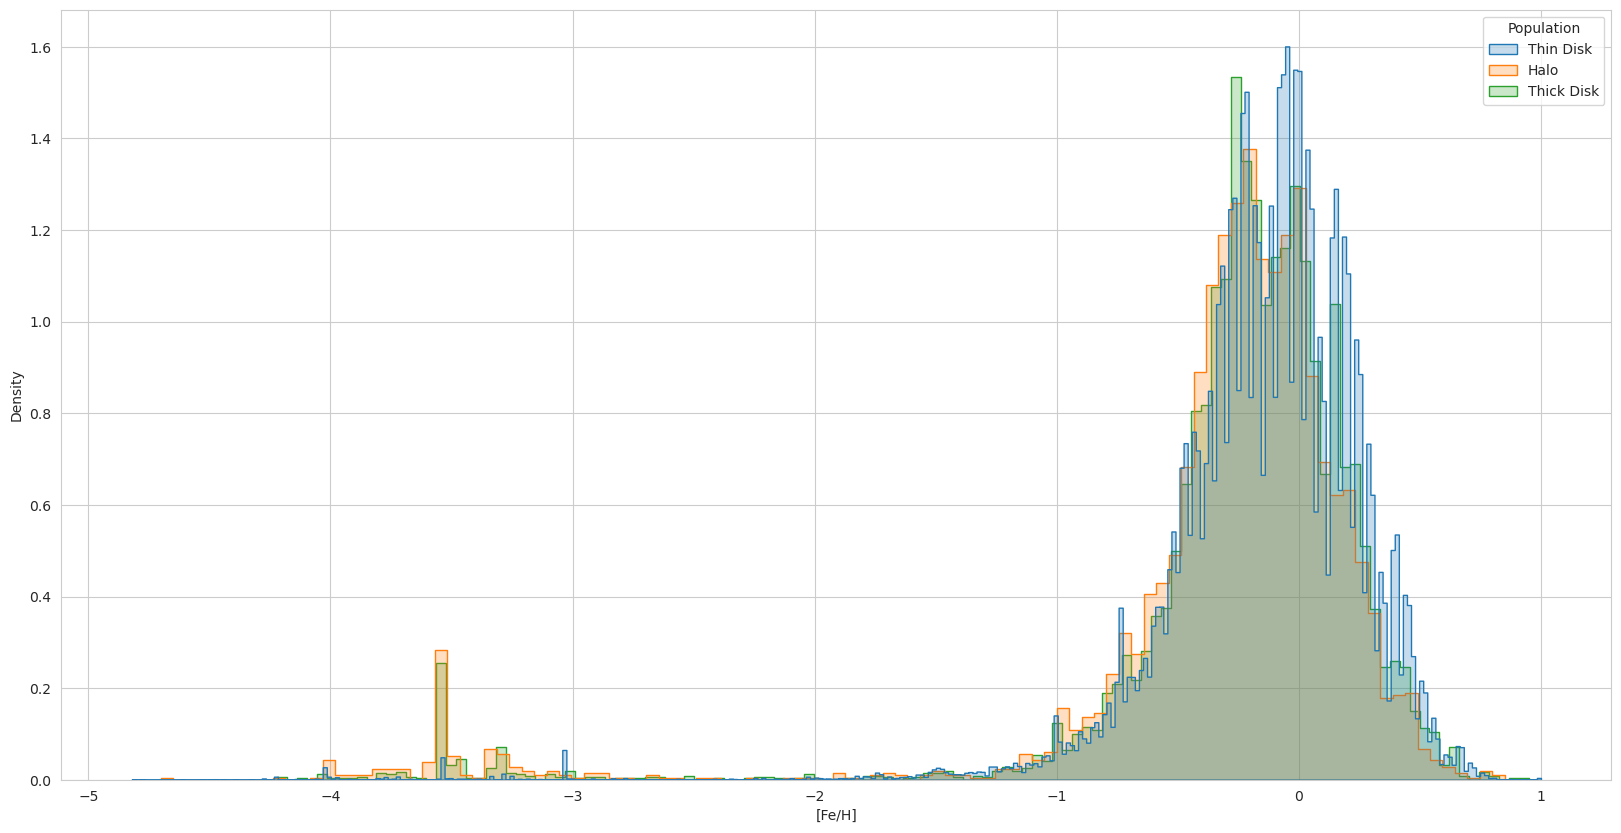

In [8]:
sns.histplot(
    data=data,
    x="[Fe/H]",
    hue="Population",
    stat="density",
    common_norm=False,
    element="step",
    common_bins=False,
)

In [7]:
# group by population and calculate mean and std of [Fe/H]
feh_stats = data.groupby("Population")["[Fe/H]"].agg(["mean", "std"])
print(feh_stats)

                mean       std
Population                    
Halo       -0.336920  0.738915
Thick Disk -0.248203  0.621163
Thin Disk  -0.145880  0.430117


(-2.0, 1.0)

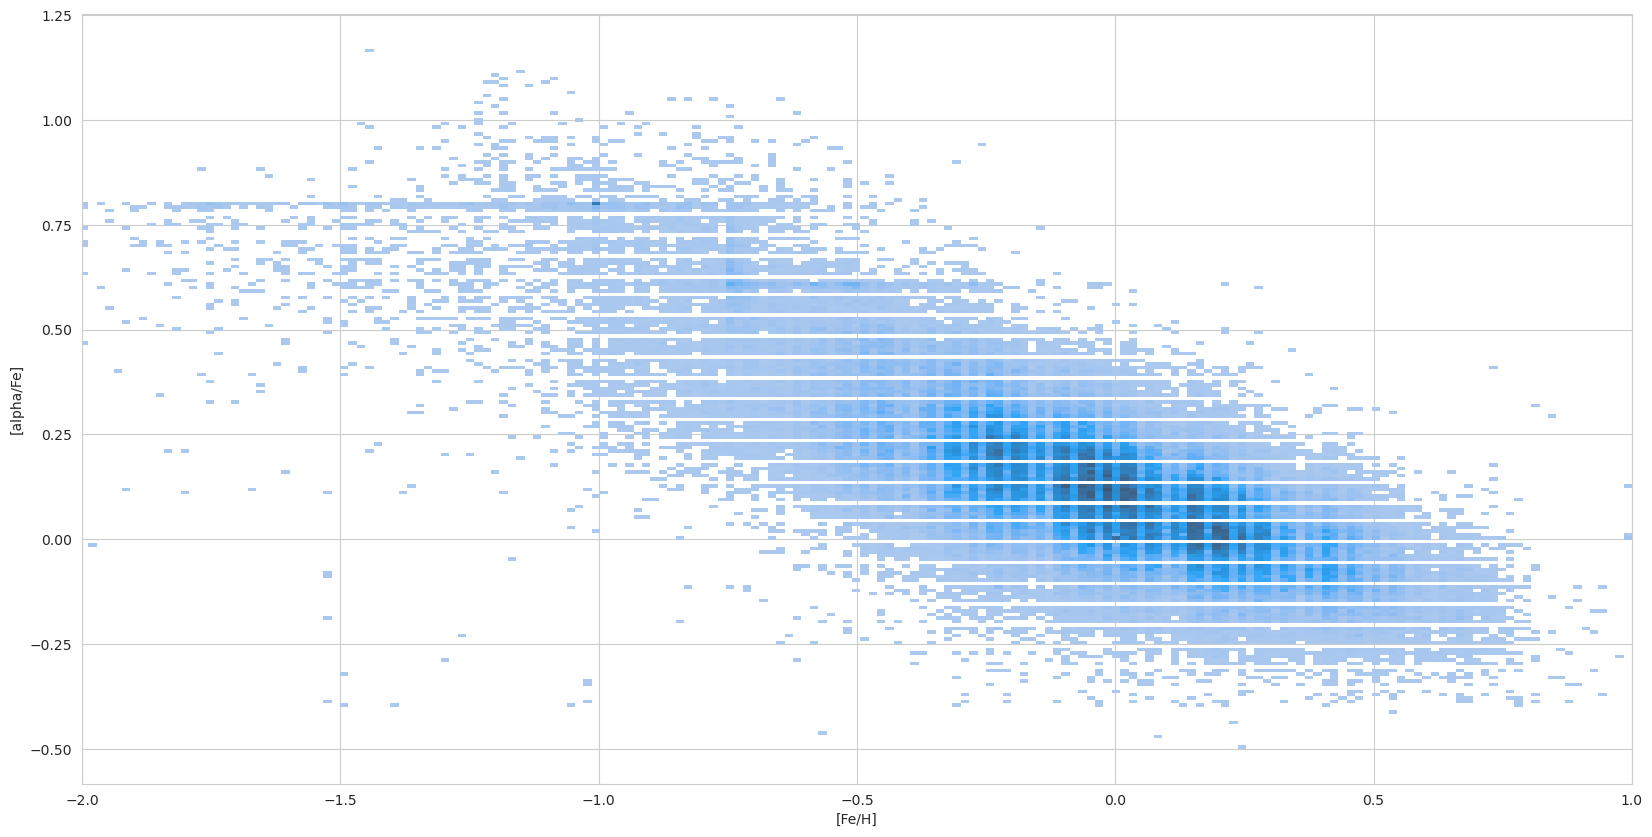

In [14]:
# plot alpha vs [Fe/H] as histogram
sns.histplot(
    data=data,
    x="[Fe/H]",
    y="[alpha/Fe]",
    stat="density",
    common_norm=False,
    element="step",
    common_bins=False,
)
# xlim between -2 an 1 for [Fe/H]
plt.xlim(-2, 1)

In [16]:
import polars as pl

In [18]:
targets = pl.read_csv(
    "../data/raw/plato_targets.csv", columns=["alphafe_gspspec", "mh_gspspec"]
)